In [7]:
%reload_ext autoreload
%autoreload 2

In [27]:
import time
import numpy as np
import pickle
import qiskit

from rb import *

In [2]:
nQ = 5
nCliffs = np.arange(1,200,20)
pattern = [[0], [1], [2], [3], [4]]
length_multiplier = [3, 3, 3, 3, 3]
shots = 1024
nSeeds = 2
backend = qiskit.Aer.get_backend('unitary_simulator')
basis_gates = ["rx", "ry"]
xdata = [nCliffs*3, nCliffs*3, nCliffs*3, nCliffs*3, nCliffs*3]

In [3]:
result_list = []
circ_list = []
for i in range(5):
    job = pickle.load(open('rb-data/single_qbt_job_lst%d.pickle' % i, 'rb'))
    circ = pickle.load(open('rb-data/single_qbt_circ_lst%d.pickle' % i, 'rb'))
    for j in job:
        result_list.append(j.result())
    for c in circ:
        circ_list.append(c)

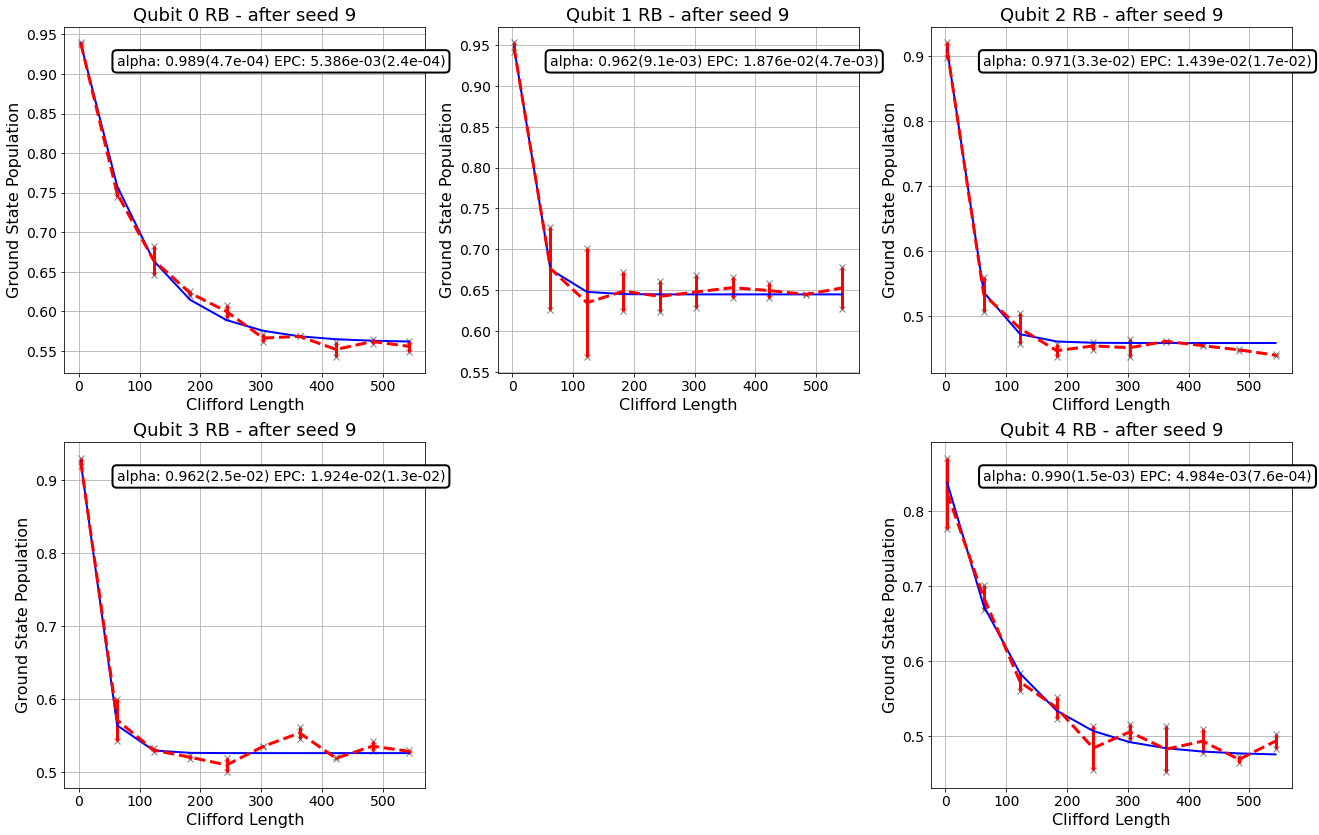

In [4]:
rb_data = plot_rb(result_list, pattern, xdata, savedata=True, savefig=False)

In [21]:
avg_gate_list = get_gate_num(circ_list, xdata, pattern, basis_gates)
print("\nAvg_gate_list:")
print(avg_gate_list)

Qubit(s): [0]
Number of rx gates per Clifford: 0.982737
Number of ry gates per Clifford: 0.831095
Qubit(s): [1]
Number of rx gates per Clifford: 0.998650
Number of ry gates per Clifford: 0.841715
Qubit(s): [2]
Number of rx gates per Clifford: 0.996387
Number of ry gates per Clifford: 0.841496
Qubit(s): [3]
Number of rx gates per Clifford: 0.991131
Number of ry gates per Clifford: 0.832774
Qubit(s): [4]
Number of rx gates per Clifford: 0.991241
Number of ry gates per Clifford: 0.821679

Avg_gate_list:
[{0: {'rx': 0.9827372262773723, 'ry': 0.8310948905109489}}, {1: {'rx': 0.9986496350364964, 'ry': 0.8417153284671532}}, {2: {'rx': 0.9963868613138687, 'ry': 0.8414963503649635}}, {3: {'rx': 0.9911313868613139, 'ry': 0.8327737226277372}}, {4: {'rx': 0.9912408759124087, 'ry': 0.8216788321167883}}]


In [55]:
nGate = []
for i in range(len(pattern)):
    num = 0
    to_add = avg_gate_list[i][i]
    for gate in to_add:
        num += to_add[gate]
    nGate.append(num)
nGate = np.array(nGate)
epc = np.array([qubit['epc'] for qubit in rb_data])
epg = 1 - (1 - epc)**(1/nGate)

for i in range(5):
    print("Error per single-qubit gate for q%d" % i, "is: {:.3%}".format(epg[i]))

Error per single-qubit gate for q0 is: 0.297%
Error per single-qubit gate for q1 is: 1.024%
Error per single-qubit gate for q2 is: 0.786%
Error per single-qubit gate for q3 is: 1.059%
Error per single-qubit gate for q4 is: 0.275%
